# Tokens, Types and TTR of corpus

In [1]:
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sympy as sym
data = pd.read_csv("C:/Users/Dell_Owner/Desktop/tweets-dataset.csv")

In [2]:
a = data.values.tolist()
for i in range (len(a)):
    a[i][0] = a[i][0].lower()

In [3]:
b = [re.sub(r'https\S+', "", str(x)) for x in a]
b = [re.sub(r'@\S+', "", str(x)) for x in b]
b = [re.sub(r'[^A-Za-z]+', " ", str(x)) for x in b]

In [161]:
count = 0
count1 = 0
x = []
y = []
c = {}
for j in range (len(b)):
    t = b[j].split()
    count = count+len(t)
    for i in t:
        if i not in c:
            c[i] = 1
        else:
            c[i]+=1
    if j%250==0:
        x.append(count)
        y.append(len(c))

In [5]:
print("Number of tokens in the corpus is: " + str(count))
print("Number of types in the corpus is: " + str(len(c)))

Number of tokens in the corpus is: 304052
Number of types in the corpus is: 34183


In [6]:
print("The TTR of the corpus is: " +str(len(c)/count))

The TTR of the corpus is: 0.11242484838119796


In [7]:
x1 = np.array(x)
y1 = np.array(y)

# Heap's Law

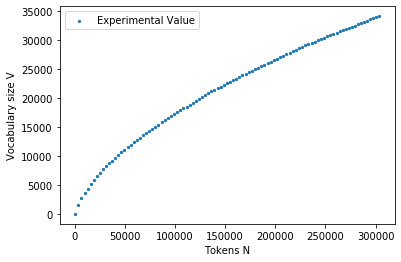

In [8]:
plt.scatter(x,y,s = 5, label = "Experimental Value")
plt.xlabel("Tokens N")
plt.ylabel("Vocabulary size V")
plt.legend()
plt.show()

In [9]:
def func(x,a,b):
    return b*(x**a)
popt, pcov = curve_fit(func, x, y)

In [10]:
print("a = %s , b = %s" % (popt[0], popt[1]))

a = 0.6207921695879094 , b = 13.62145449322949


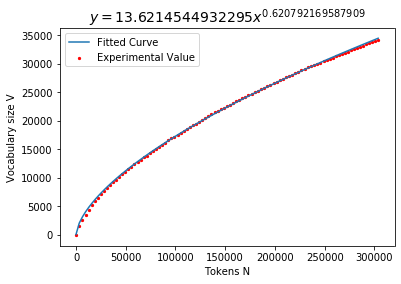

In [11]:
plt.plot(x, func(x, *popt), label="Fitted Curve")
plt.scatter(x,y,s = 5, label = "Experimental Value",c = "r")
plt.legend()
xs = sym.Symbol('x')    
tex = sym.latex(func(xs,*popt)).replace('$', '')
plt.title(r'$y= %s$' %(tex),fontsize=14)
plt.xlabel("Tokens N")
plt.ylabel("Vocabulary size V")
plt.show()

In [162]:
c_sorted = sorted(c.items(), key = lambda t:(t[1], t[0]),reverse = True)
d_sorted = []
for i in range (len(c_sorted)):
    d_sorted.append(c_sorted[i][0])
d = dict(c_sorted)

# Zipf's Law Showing Inverse Relation between Length and Frequency

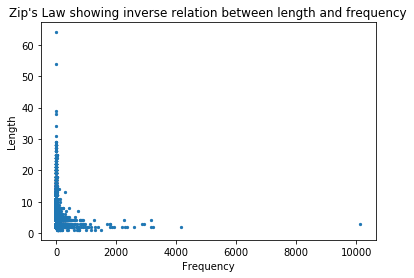

<Figure size 576x288 with 0 Axes>

In [23]:
a1 = []
a2 = []
for i in d:
    a1.append(len(i))
    a2.append(d[i])
plt.scatter(a2,a1,s = 5)
plt.xlabel("Frequency")
plt.ylabel("Length")
plt.title("Zip's Law showing inverse relation between length and frequency")
plt.figure(figsize = (8,4))
plt.show()

# Zipf's Law showing direct relation between number of meanings and square root of frequency

In [14]:
from nltk.corpus import wordnet
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell_Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell_Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

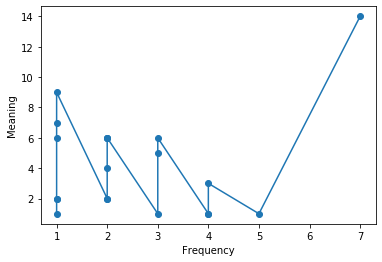

In [160]:
import random
import math
words = random.choices(d_sorted, k=100)
#print(words)
dict2 = dict()
x_new=[]
y_new=[]
for i in words:
    dict2[i] = wordnet.synsets(i)
    sy = wordnet.synsets(i)
    
    if len(sy)>0:
        x_new.append(len(sy[0].lemmas()))
        y_new.append(d[i])

def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)]   
    return z 

y_new = sort_list(y_new,x_new)
x_new.sort()

plt.scatter(x_new,y_new)
plt.xlabel("Frequency")
plt.ylabel("Meaning")
plt.plot(x_new,y_new)